In [1]:
# @title Install Alibi
try:
  import alibi
except:
  !pip install alibi

     |████████████████████████████████| 235kB 5.2MB/s 
     |████████████████████████████████| 327kB 5.8MB/s 
     |████████████████████████████████| 28.0MB 154kB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463905 sha256=72eb1a4e4b8123e1f112b1120daaad5f4f3a5b0429d0e82d8de1ebe53b3e00ba
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052145 sha256=9aa50240509451244ca539de36182f8618fdcbce24d6247096fd7025ee7fb3e5
  Stored in directory: /root/.cache/pip/wheels/2a/2b/0a/d6fb6235c56d014d224bca760d15d7cbdd820813085ffcd35d
Successfully built shap spacy-lookups-data


In [3]:
# @title Importing modules
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR) # suppress deprecation
                                             # messages
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from alibi.datasets import fetch_imagenet
from alibi.explainers import AnchorImage

In [4]:
# @title Load InceptionV3 model pretrained on ImageNet
model = InceptionV3(weights='imagenet')


96116736/96112376 [==============================] - 1s 0us/step


In [6]:
mapping = {'Persian cat': 'n02123394',
           'volcano': 'n09472597',
           'strawberry': 'n07745940',
           'centipede': 'n01784675',
           'jellyfish': 'n01910747'}

In [7]:
# @title Download image form ImageNet
category = 'Persian cat' # @param ["Persian cat", "volcano",
#                                  "strawberry", "centipede",
#                                  "jellyfish"]
image_shape = (299, 299, 3)
data, labels = fetch_imagenet(category, nb_images=25,
                              target_size=image_shape[:2],
                              seed=2, return_X_y=True)
print('Images shape: {}'.format(data.shape))

Images shape: (25, 299, 299, 3)


In [8]:
# @title Process image and make predictions
images = preprocess_input(data)
preds = model.predict(images)
label = decode_predictions(preds, top=3)
print(label[0])
# @title Define prediction model
predict_fn = lambda x: model.predict(x)

40960/35363 [==================================] - 0s 0us/step
[('n02123394', 'Persian_cat', 0.90272146), ('n03207941', 'dishwasher', 0.0036570695), ('n03832673', 'notebook', 0.0024634376)]


In [9]:
# @title Initialize anchor image explainer
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}
explainer = AnchorImage(predict_fn, image_shape,
                        segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs,
                        images_background=None)

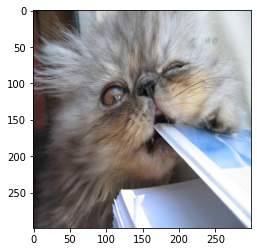

In [10]:
i = 0
plt.imshow(data[i]);

In [11]:
# @title Anchor explanation
image = images[i]
np.random.seed(0)
explanation = explainer.explain(image, threshold=.95,
                                p_sample=.5,tau=0.25)

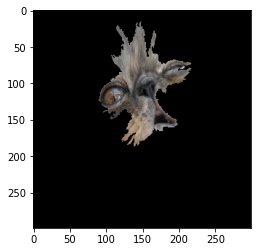

In [12]:
# @title Superpixels in the anchor
plt.imshow(explanation.anchor);

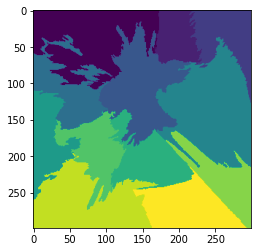

In [14]:
# @title Superpixels in the anchor
plt.imshow(explanation.segments);